# 🏥 Breast Cancer Diagnosis using kNN

---
&nbsp;

# Table of Contents
1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preparation](#data-preparation)
4. [Modeling](#modeling)
5. [Evaluation](#evaluation)
6. [Conclusion](#conclusion)

---
&nbsp;

## 🎯 Business Understanding
Breast cancer diagnosis is a critical problem in healthcare, and an accurate classification model can help in early detection, potentially improving patient outcomes. When a new patient’s tumor features **(e.g., radius, texture, smoothness, compactness)** are entered into the system, the kNN classifier predicts whether the tumor is malignant (M) or benign (B).
The goal of of this analysis is to train a binary classifier for predicting the cancer diagnosis (malignant / benign). We will use the breast cancer dataset that is available at 🔗 [Breast Cancer Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)


---
&nbsp;

## 🔍 Data Understanding
There was no column names so i had to make them myself. I understand now that they often come as raw data file. Theres no quality issues with the data. Down there you can see the column names and the values. 
I'll explain column 2 now, Diagnosis (M = malignant, B = benign). 
Ten real-valued features are computed for each cell nucleus:
radius (mean of distances from center to points on the perimeter),
texture (standard deviation of gray-scale values)
perimeter, area,
smoothness (local variation in radius lengths),
 compactness (perimeter^2 / area - 1.0),
concavity (severity of concave portions of the contour),
concave points (number of concave portions of the contour),
symmetry,
fractal dimension ("coastline approximation" - 1) <br>
Down below ive check for missing values and given us the Basic statistics


In [97]:
import pandas as pd

# let's define the column names based on the dataset description
column_names = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]
file_path = "data.csv"
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

print(df.isnull().sum())  # Checking for missing values

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [98]:
print(df.describe()) 


                 ID     radius1    texture1  perimeter1        area1  \
count  5.690000e+02  569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   14.127292   19.289649   91.969033   654.889104   
std    1.250206e+08    3.524049    4.301036   24.298981   351.914129   
min    8.670000e+03    6.981000    9.710000   43.790000   143.500000   
25%    8.692180e+05   11.700000   16.170000   75.170000   420.300000   
50%    9.060240e+05   13.370000   18.840000   86.240000   551.100000   
75%    8.813129e+06   15.780000   21.800000  104.100000   782.700000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

       smoothness1  compactness1  concavity1  concave_points1   symmetry1  \
count   569.000000    569.000000  569.000000       569.000000  569.000000   
mean      0.096360      0.104341    0.088799         0.048919    0.181162   
std       0.014064      0.052813    0.079720         0.038803    0.027414   
min       0.052630      0.019380    0.00000

---
&nbsp;

## 🛠 Data Preparation
To preprocess the data i chose names for each column, since there were no column names. 


In [99]:
import pandas as pd

# let's define the column names based on the dataset description
column_names = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]
file_path = "data.csv"
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()


,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
&nbsp;

## 🚀 Modeling
I chose hold-out validation technique for validation, so i split the dataset into a training set and a testing set, <br>in conjuction with the kNN classifier. 70% of the data will be used for training, 30% for testing. <br> Since our dataset had some features with very different scales, i applied standardization. I chose kNN classifier as machine learning method, i dropped 'Diagnosis' column so i only kept numerical values, my target variable was 'Diagnosis'. I tested the accuracity on Knn classifier on the test set with 3 different hyperparameter k values. **Conclusion:** The model performed best with `k=3`, achieving **77% accuracy**.



In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns= 'Diagnosis') # Drop the 'Diagnosis' column, keep only numerical features
y = df['Diagnosis']  # Target variable (Diagnosis of the patiant)

# Split the dataset into a training set and a testing set
# 70% of the data will be used for training, 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, df['Diagnosis'], test_size=0.3,random_state=123)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train, transform train
X_test_scaled = scaler.transform(X_test)  # Transform test (DO NOT FIT AGAIN!)
# Create a kNN classificator
# n_neighbors parameter specifies the number of neighbors to use (k)
knn = KNeighborsClassifier(n_neighbors=8)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

## Use the trained classifier to predict labels for the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the classifier on the test set
accuracy_test = accuracy_score(y_test, y_pred)

print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

print(y_pred[:10])  # Show the first 10 predictions




Accuracy of kNN classifier on the test set: 0.68
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']


```markdown
| k Value | Accuracy |
|---------|----------|
| 3       | 77%      |
| 5       | 76%      |
| 7       | 72%      |
| 8       | 68%      |

---
&nbsp;

## 📊 Evaluation
After training the model, we assess its performance using a confusion matrix and key evaluation metrics such as accuracy, precision, recall. These metrics provide insights into the classifier's ability to correctly identify benign and malignant cases. The confusion matrix visually represents the model's predictions, indicating how many samples were correctly or incorrectly classified.

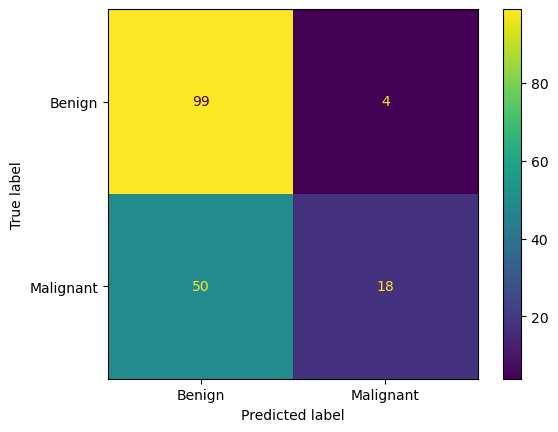

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the trained model
y_pred = knn.predict(X_test)  # Ensure knn is trained before this step

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
cmd.plot()


In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.66      0.96      0.79       103
   Malignant       0.82      0.26      0.40        68

    accuracy                           0.68       171
   macro avg       0.74      0.61      0.59       171
weighted avg       0.73      0.68      0.63       171



#### **The following conclusions can be drawn** :
- We can see that the yellow part is saying 99 was predicted correctly and 4 was predicted wrongly.
- Malignant prediction was very bad as we can see, im not sure is suppose be like this in this assigment, i could try to fix it. But the **model predicted 50 Malignant cases as Benign** which is very bad.

#### **Perhaps the most common metric used to indicate the performance of the classifier is the *Accuracy*, and this is it:**
(99 + 18)/171 = 0,6842 ≈ 68.42%


#### **Now we will do *Recall* to show the ratio of correct class predictions to the total number of samples belonging to that class.**
Benign : 99 / 103 = 0,961 ≈ 96%
Malignant: 18  / 68 = 0,264 ≈ 24%


#### **Next we'll do *Precision* to see the ratio of correct class predictions to the total number of predictions (given by the model) with that class**:
Benign : 99 / 104 = 0,95 ≈ 95%
Malignant : 18 / 69 = 0,26 ≈ 26%


---
&nbsp;

## Deployment ##

**How will the model be used in practice?**
The trained k-Nearest Neighbors (kNN) classifier can be used as a decision support tool for doctors to help classify breast cancer tumors as benign (B) or malignant (M) based on patient data. In practice the model can be integrated into healthcare systems in the following ways:


**1.Clinical Decision Support System**:
* The model can be embedded into a hospital’s electronic health record system
* When doctors enter a patient's biopsy results, the system will provide a predicted diagnosis (B or M).
* The doctor can then use this prediction as an additional input when making decisions.

**2.Web-Based Application for Cancer Diagnosis:**
* A web-based tool can be developed where users (e.g., medical professionals) input tumor characteristics.
* The model will return a classification along with probabilities (e.g., "Malignant: 78% confidence").

**How will the results be communicated?** To ensure the model’s predictions are understood and actionable, results should be presented clearly:

**1.Confusion Matrix & Key Metrics:**
* The confusion matrix shows the number of correct vs. incorrect predictions.
* Key performance metrics such as accuracy, precision, recall, and F1-score should be reported regularly.

**2.Probability Scores for Predictions:**
* Instead of just outputting "Malignant" or "Benign," the model should provide a probability score (e.g., "Malignant, 85% confidence").
* This will help doctors make informed decisions rather than relying entirely on the model.

**3.Regular Model Updates & Monitoring:**
* Since medical data evolves, the model should be continuously evaluated and retrained with new patient data.
* Performance metrics should be monitored over time to detect potential biases or drift in the model.